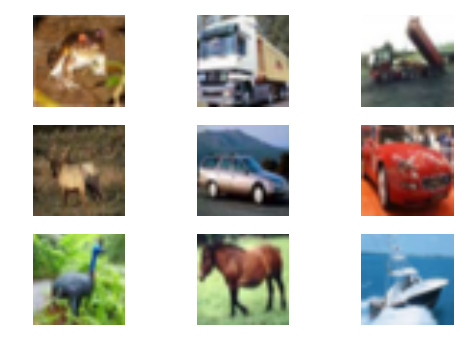

In [32]:
from keras.datasets import cifar10
# import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.misc import toimage
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    # subplot(nrows, ncols, plot#) or (331) means 3 rows, 3 columns, the plot number
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))
    pyplot.axis('off')
    
# show the plot
pyplot.show()

In [34]:
# To perform mathematical computations
import numpy
# Required to create a linear stack of layers
from keras.models import Sequential
# Required to allow for allowing connections between each neuron in the current layer and the next layer.
from keras.layers import Dense
# Required to reduce the complexity of a model by deactivating certain neurons to prevent overfitting of the model.
from keras.layers import Dropout
# Reduces the dimensionality of the model to a 2 dimensional matrix.
from keras.layers import Flatten
# Need to know more about maxnorm
from keras.constraints import maxnorm
# An optimizer in this case Stochastic Gradient Descent is used to compile a Deep Learning Model.
from keras.optimizers import SGD
# Required to create Convolutional Layers
from keras.layers.convolutional import Convolution2D
# Required to create Max-Pooling layers that aid in downsampling inputs.
from keras.layers.convolutional import MaxPooling2D
# Importing to_categorical to be used in keras to convert integers to a binary class matrix to be used with categorical_crossentropy
from keras.utils.np_utils import to_categorical
from keras import backend as K
# 'th' dictates the shape of the image (samples, channels, width, height)
K.set_image_dim_ordering('th')

In [21]:
# Creating Uniform randomness to measure effectiveness of results.
seed = 7
numpy.random.seed(seed)

# Converting integer pixel values to floats 
X_train = X_train.astype('float32')
# Converting integer pixel values to floats
X_test = X_test.astype('float32')
# Normalizing data as cifar-10 is a well studied data-set & the max observed pixel value is 255.0
X_train = X_train / 255.0
# Normalizing data as cifar-10 is a well studied data-set & the max observed pixel value is 255.0
X_test = X_test / 255.0

In [22]:
# the vector y_train is converted to a binary class matrix
y_train = to_categorical(y_train)
# the vector y_test is converted to a binary class matrix
y_test = to_categorical(y_test)
# We see how many classes the 1st y_test vector has
num_classes = y_test.shape[1]

# Beginnning to create a deep learning CNN model.
model = Sequential()

# The first Conv Layer
# outputs to 32 feature maps of size 3 X 3, takes an input of an image that has 3 channels and is 32 X 32 pixels. Has a relu activation fn
model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
# Dropout set to 20%
model.add(Dropout(0.2))
# Second conv layer
# Outputs 32 feature maps of size 3 X 3, applies activation and has maxnorm constraint of 3.
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
# reduces the dimensionality of the input image by 1/2.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Reduces the dimensionality to 2.
model.add(Flatten())
# Connecting the flattened image to a fully connected layer with 512 neurons and applying the activation fn.
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
# Dropout here is set to 50% to avoid overfitting.
model.add(Dropout(0.5))
# This is the output layer (Fully connected). Here we apply softmax activation to get values between 0 & 1.
model.add(Dense(num_classes, activation='softmax'))
# Compile model
# Num Epochs
epochs = 25
# Learning rate
lrate = 0.01
# Learning rate decay per epoch.
decay = lrate/epochs
# Parameterizing the stochastic gradient descent to be used during compilation.
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 32, 32, 32)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 32, 32, 32)    9248        dropout_3[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 32, 16, 16)    0           convolution2d_4[0][0]            
___________________________________________________________________________________________